# **The Avila Dataset**

The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.

# **1. Importation and installation of the different modules**

### **1.1 Installation of the different modules that are not directly in anaconda**

In [11]:
!pip install mlxtend==0.19.0
from mlxtend.plotting import plot_pca_correlation_graph #exist in mlxtend version 0.19.0 (!pip install mlxtend==0.19.0)

### **1.2 Importation of the used modules in the code**

In [12]:
from google.colab import output
import warnings
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

### **1.3 The datas**

  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The [data](https://archive.ics.uci.edu/ml/datasets/Avila) have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

# **2. Dataframe creation and visualization**


### **2.1 Importation of the data**

In [13]:
path="/content/avila-tr.txt"
colonnes=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10"]
df=pd.read_csv(path)

### **2.2 Data-Visualization**

In [ ]:
df.shape

(10430, 11)

In [ ]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Copyist
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   F1       10430 non-null  float64
 1   F2       10430 non-null  float64
 2   F3       10430 non-null  float64
 3   F4       10430 non-null  float64
 4   F5       10430 non-null  float64
 5   F6       10430 non-null  float64
 6   F7       10430 non-null  float64
 7   F8       10430 non-null  float64
 8   F9       10430 non-null  float64
 9   F10      10430 non-null  float64
 10  Copyist  10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


In [ ]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


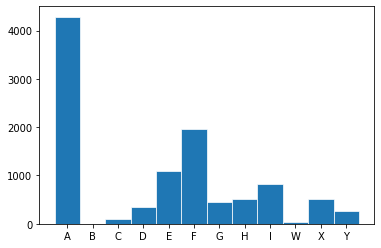

In [ ]:
countA = 0
countB = 0
countC = 0
countD = 0
countE = 0
countF = 0
countG = 0
countH = 0
countI = 0
countW = 0
countX = 0
countY = 0
for index, row in df.iterrows():
  if "A" in row["Copyist"] :
    countA = countA + 1
  elif "B" in row["Copyist"]:
    countB = countB+1
  elif "C" in row["Copyist"]:
    countC = countC+1
  elif "D" in row["Copyist"]:
    countD = countD+1
  elif "E" in row["Copyist"]:
    countE = countE+1
  elif "F" in row["Copyist"]:
    countF = countF+1
  elif "G" in row["Copyist"]:
    countG = countG+1
  elif "H" in row["Copyist"]:
    countH = countH+1
  elif "I" in row["Copyist"]:
    countI = countI+1
  elif "W" in row["Copyist"]:
    countW = countW+1
  elif "X" in row["Copyist"]:
    countX = countX+1
  elif "Y" in row["Copyist"]:
    countY = countY+1
countCopyist = [countA,countB,countC,countD,countE,countF,countG,countH,countI,countW,countX,countY]
diffCopyist = ["A","B","C","D","E","F","G","H","I","W","X","Y"]
fig, ax = plt.subplots()
ax.bar(diffCopyist, countCopyist, width=1, edgecolor="white", linewidth=0.7)
plt.show()


**We can see that the distribution isn't equal at all between the copyists. We have a lot more samples written by the copyist 'A' than the copyist 'B'.**

**Split the dataframe into "feature:target"**

In [14]:
monX = df[colonnes]
monY = df["Copyist"]

**Split the whole dataset into 2 Test and Train Dataframe (Test/Train ratio of 0.33)**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(monX, monY, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6988, 10)
(3442, 10)
(6988,)
(3442,)


**Import the dataset we need to predict**

In [16]:
pathTest="/content/avila-ts.txt"
colonnes=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10"]
df_Test=pd.read_csv(pathTest)

In [ ]:
df_Test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Copyist
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


**The nature of the datas we see here are basically the same as the dataset of train we saw earlier : because all the dataset has been normalized, by using the Z-normalization method.**

In [ ]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   F1       10437 non-null  float64
 1   F2       10437 non-null  float64
 2   F3       10437 non-null  float64
 3   F4       10437 non-null  float64
 4   F5       10437 non-null  float64
 5   F6       10437 non-null  float64
 6   F7       10437 non-null  float64
 7   F8       10437 non-null  float64
 8   F9       10437 non-null  float64
 9   F10      10437 non-null  float64
 10  Copyist  10437 non-null  object 
dtypes: float64(10), object(1)
memory usage: 897.1+ KB


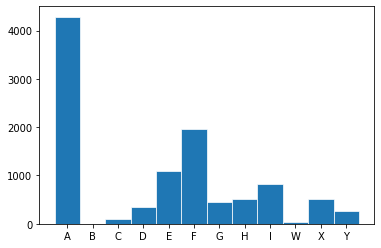

In [ ]:
countA = 0
countB = 0
countC = 0
countD = 0
countE = 0
countF = 0
countG = 0
countH = 0
countI = 0
countW = 0
countX = 0
countY = 0
for index, row in df_Test.iterrows():
  if "A" in row["Copyist"] :
    countA = countA + 1
  elif "B" in row["Copyist"]:
    countB = countB+1
  elif "C" in row["Copyist"]:
    countC = countC+1
  elif "D" in row["Copyist"]:
    countD = countD+1
  elif "E" in row["Copyist"]:
    countE = countE+1
  elif "F" in row["Copyist"]:
    countF = countF+1
  elif "G" in row["Copyist"]:
    countG = countG+1
  elif "H" in row["Copyist"]:
    countH = countH+1
  elif "I" in row["Copyist"]:
    countI = countI+1
  elif "W" in row["Copyist"]:
    countW = countW+1
  elif "X" in row["Copyist"]:
    countX = countX+1
  elif "Y" in row["Copyist"]:
    countY = countY+1
countCopyist = [countA,countB,countC,countD,countE,countF,countG,countH,countI,countW,countX,countY]
diffCopyist = ["A","B","C","D","E","F","G","H","I","W","X","Y"]
fig, ax = plt.subplots()
ax.bar(diffCopyist, countCopyist, width=1, edgecolor="white", linewidth=0.7)
plt.show()


**We can see that the dataset we need to predict has rigorously the same distribution as the dataset we use to train our models**

In [17]:
X_train2 = monX
y_train2 = monY
X_test2 = df_Test[colonnes]
y_test2 = df_Test["Copyist"]

In [ ]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(10430, 10)
(10437, 10)
(10430,)
(10437,)


### **2.3 PCA & Link between all the features**

**a) PCA**

[0.72832876 0.06770624 0.05131548 0.04511557 0.03251651 0.02717799
 0.01771912 0.01642595 0.00927237 0.00442201]


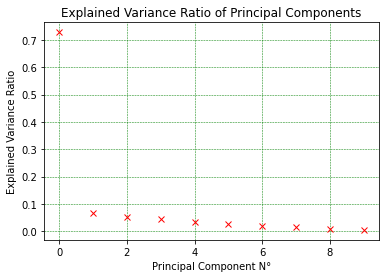

In [ ]:
pca = PCA(n_components=10, svd_solver='auto')
pca.fit(X_train,y_train)
print(pca.explained_variance_ratio_)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_, 'rx')
plt.xlabel('Principal Component N°')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

**By using only the 2 first components of the PCA, nearly 80% of the total variance is explained.**

In [ ]:
X_train2Bis = X_train2
y_train2Bis = y_train2


pca = PCA()
colonnes=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10"]
components = pca.fit_transform(df[colonnes])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["Copyist"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

**We can already see some groups of copyists**

In [ ]:
pca = PCA(n_components=2, svd_solver='auto')
pca.fit(X_train2,y_train2)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['Copyist'],title="2 component PCA",labels={
                     "color": "Copyist"})

for i, feature in enumerate(colonnes):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()

**Copyist 'A' has extreme values, data related to this copyist are very scatterred in comparaison on the other copyists. By zooming at the center of the plot, we can already see the correlation and the differences between all the features : as shown on the correlation circle below.**

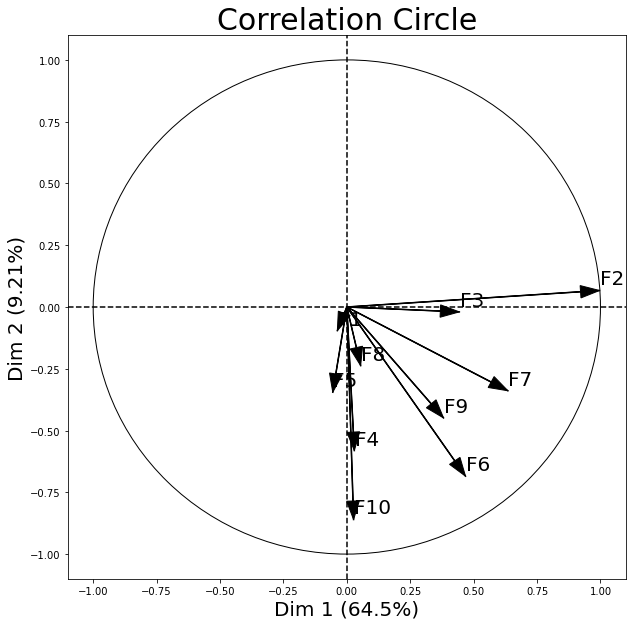

In [ ]:
feature_names = colonnes
figure, correlation_matrix = plot_pca_correlation_graph(X_train2, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

**The correlation circle between all the features shows that some features are very correlated like F10 and F6 or F7 and F6, but some aren't correlated at all like F10 and F2 or F4 and F3.**

**And this was predictable, because, for instance, F6 and F7 are representing the modular ratio and interlinear spacing of the copyist whereas F10 is a feature composed of the modular ratio over the interlinear spacing, so F10 is closely related to both of these features because it is directly composed by them.**

In [ ]:
correlation_matrix

,Dim 1,Dim 2
F1,-0.037399,-0.095770
F2,0.996355,0.066776
F3,0.443668,-0.019775
F4,0.029615,-0.581172
F5,-0.055391,-0.345029
F6,0.467863,-0.684625
F7,0.635130,-0.338998
F8,0.054509,-0.237355
F9,0.381281,-0.448926
F10,0.026608,-0.860202


In [ ]:
X_train2Pca = X_train2
y_train2Pca = y_train2

principalComponents = pca.fit_transform(X_train2Pca,y_train2Pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train2], axis = 1)
finalDf

,principal component 1,principal component 2,Copyist
0,-0.006835,-0.818146,A
1,0.927388,-1.505284,A
2,0.050086,-0.080223,A
3,0.039193,0.384389,A
4,0.877966,-0.183650,F
...,...,...,...
10425,0.565341,0.309215,F
10426,-0.344933,0.768013,F
10427,0.056698,-0.464648,A
10428,0.525409,-1.640979,E


In [ ]:
finalDf.describe()

,principal component 1,principal component 2
count,1.043000e+04,1.043000e+04
mean,-1.041459e-16,-6.730528e-17
std,4.082059e+00,1.541840e+00
min,-5.393055e+00,-4.709823e+00
25%,-3.374893e-01,-8.787316e-01
50%,-3.442838e-02,-1.297629e-01
75%,2.539915e-01,6.344060e-01
max,4.037440e+02,2.138778e+01


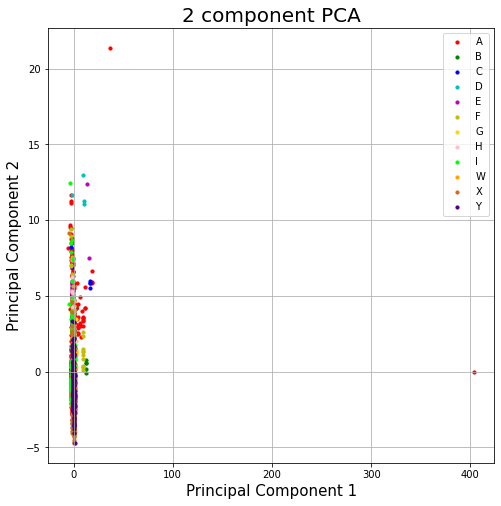

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X','Y']
colors = ['r', 'g', 'b','c','m','y','gold','pink','lime','orange','chocolate','indigo']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Copyist'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

**Using a different method, we can see that the PCA plot still gives extremes values for copyist 'A'.**

**The plots below are the plot of every features together, first for the dataset of training...**

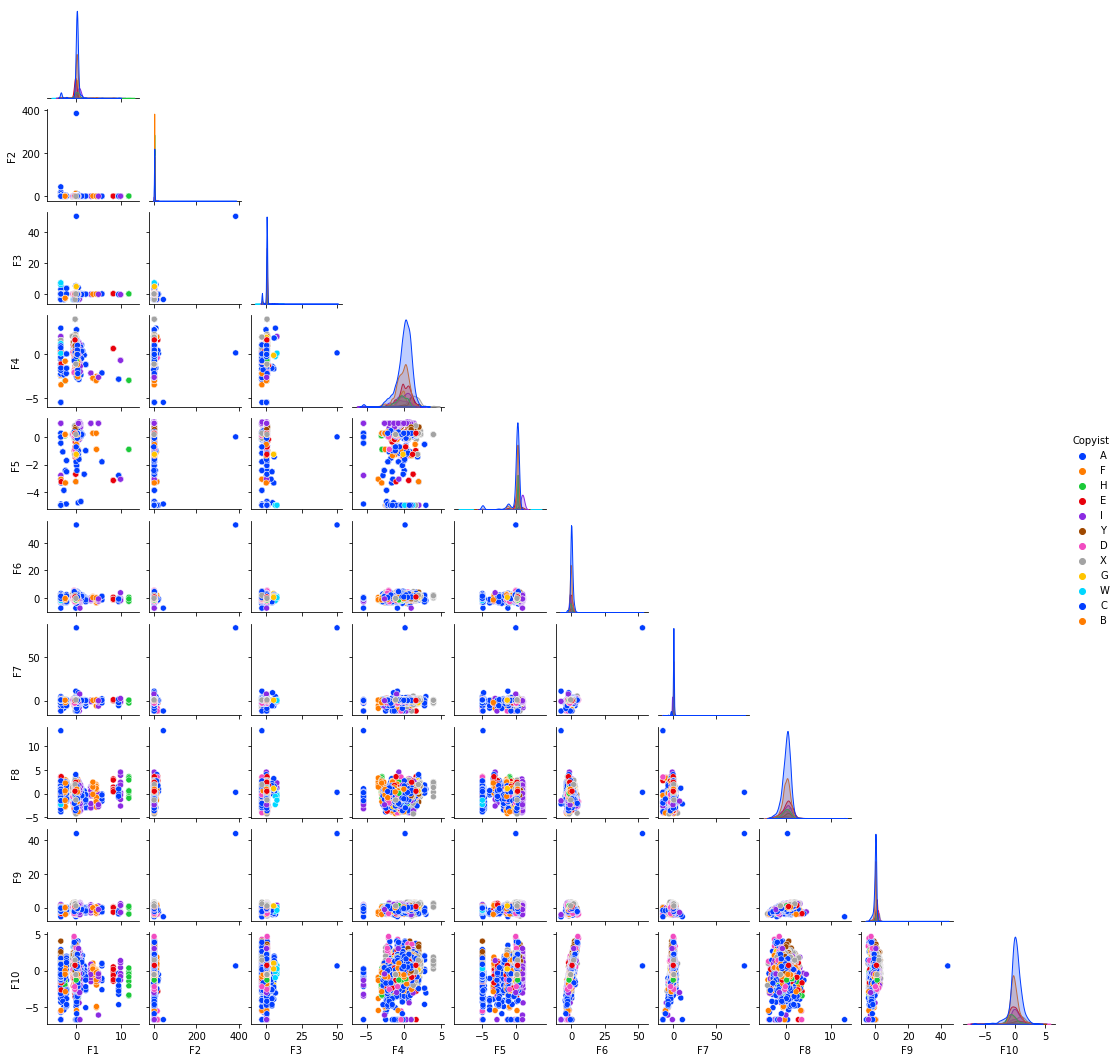

In [25]:
sn.pairplot(df, diag_kind='kde', corner=True,hue="Copyist", height= 1.5, aspect = 1, palette = "bright")

**... And then for the dataset of testing.**

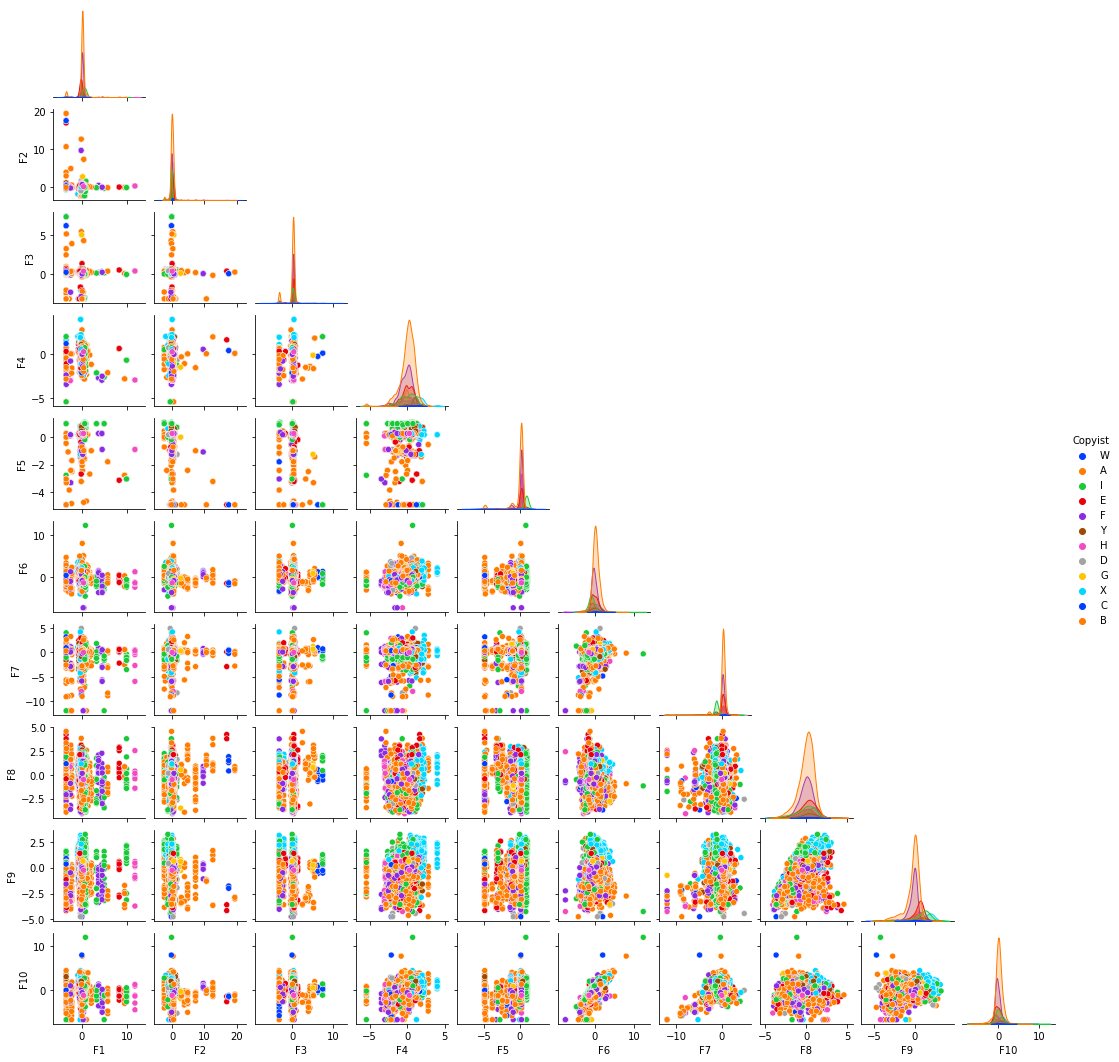

In [26]:
sn.pairplot(df_Test, diag_kind='kde', corner=True,hue="Copyist", height= 1.5, aspect = 1, palette = "bright")

**Correlation is far more visible with the plots of the testing dataset features correlations because their are not 'extreme' values for the copyist 'A' like before and we begin to clearly see some linear correlation between features like F6 and F10 or F10 and F7.**

**With the correlation matrix of the two datasets, our earlier assumptions are now settled.**

**F10, F6 and F7 are strongly correlated. But we discover other surprising correlations like between F5 and F1 which correspond to row number and intercolumnar distance. Or between F2 and F7 which correspond to upper margin and interlinear spacing.**

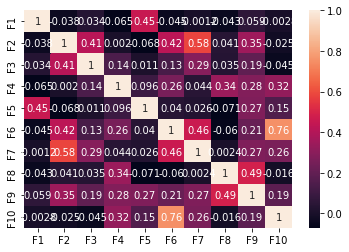

In [ ]:
corrMatrix = X_train2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

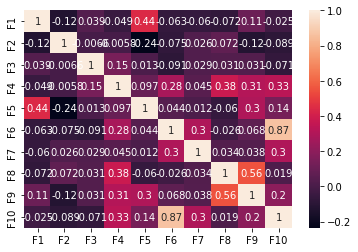

In [ ]:
corrMatrixTest = X_test2.corr()
sn.heatmap(corrMatrixTest, annot=True)
plt.show()

**To illustrate the correlation between F6 and F10, we can use the following plots.**

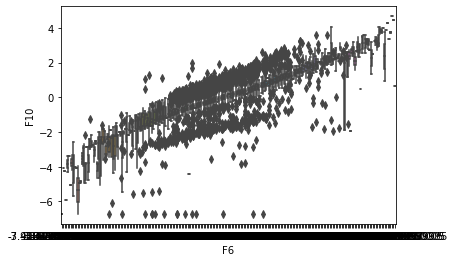

In [ ]:
sn.boxplot(x = 'F6', y = 'F10', data = df)

In [ ]:
fig = px.scatter(df, x="F6", y="F10", color="Copyist")
fig.show()

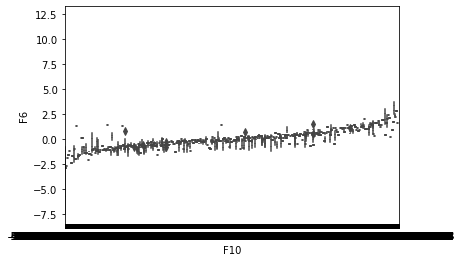

In [ ]:
sn.boxplot(x = 'F10', y = 'F6', data = df_Test)

In [ ]:
fig = px.scatter(df_Test, x="F10", y="F6", color="Copyist")
fig.show()

**Even copyist value distribution are strongly similar.**

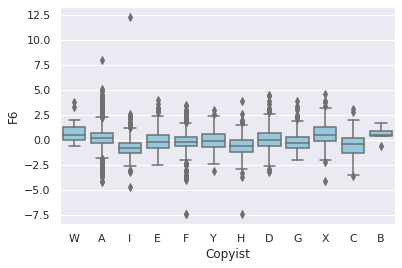

In [ ]:
sn.set(style="darkgrid")
sn.boxplot(x = 'Copyist', y = 'F6', data = df_Test, color='skyblue')

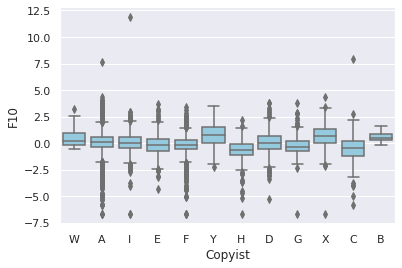

In [ ]:
sn.set(style="darkgrid")
sn.boxplot(x = 'Copyist', y = 'F10', data = df_Test, color='skyblue')

**For exemple, here is the copyist distribution of the F1 feature : the intercolumnar distance.**

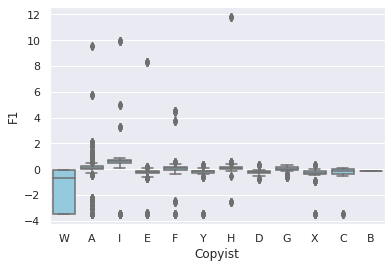

In [ ]:
sn.set(style="darkgrid")
sn.boxplot(x = 'Copyist', y = 'F1', data = df_Test, color='skyblue')

**Here are the features distribution for each copyist.
We can see that some copyists have featured more and more normally scattered. But some behave very unpredictably : accordingly, these are the copyist with the least train samples (n.b. the histogram of 2.2 section)**

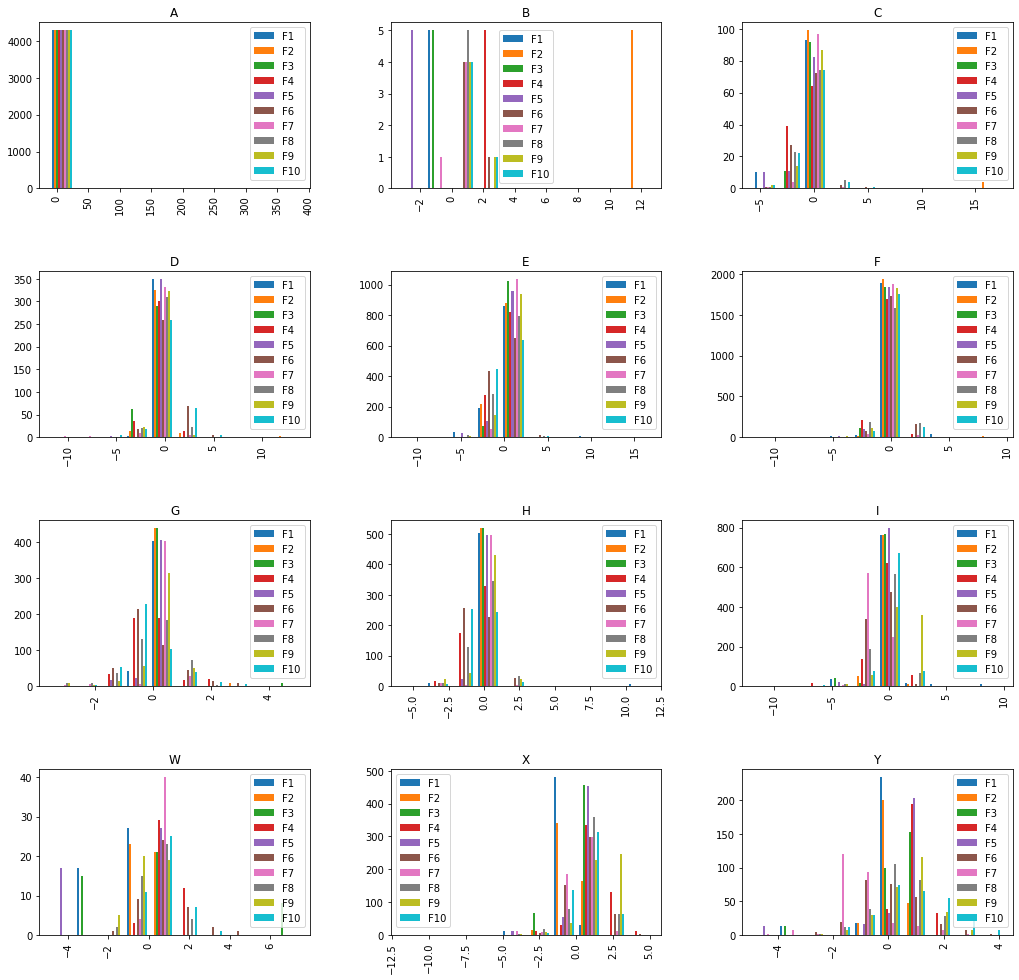

In [ ]:
hist = df[colonnes].hist(by=df['Copyist'], legend = True,figsize = [16.9,16.9])

# **3. Prediction**

### **3.1 Scaling**

**Data have already be Z-normalized, learning algorithms can also benefit from scaling the data.**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train2)                 # Il ne faut fiter que sur les data d'entrainement
X_train2 = scaler.transform(X_train2)
X_test2  = scaler.transform(X_test2)  # apply same transformation to test data

### **3.2 Model testing and prediction**

**3.2.1 KNeighbors**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 4, weights = "distance", metric = "euclidean")
model.fit(X_train,y_train)
print('train score',model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))

train score 1.0
test score 0.7402672864613596


**KNeighbors give roughly a 74% accuracy. Note : this accuracy is purely indicative, since we don't use yet cross validation and hyperparameters.)**

**We need to find the optimal number of neighbor, and then find the best parameter for the weights parameter.**

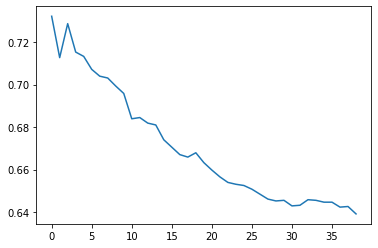

In [ ]:
KVoisinsScore = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors = i, weights = "uniform")
    model.fit(X_train,y_train)
    KVoisinsScore.append(model.score(X_test,y_test))
plt.plot(KVoisinsScore)
    

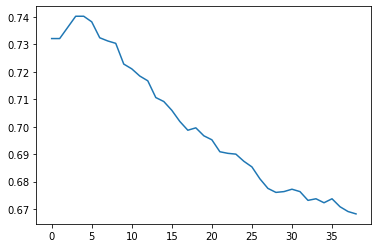

In [ ]:
KVoisinsScore = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors = i, weights = "distance")
    model.fit(X_train,y_train)
    KVoisinsScore.append(model.score(X_test,y_test))
plt.plot(KVoisinsScore)

**Using 'distance' as parameter for 'weights' is improving the accuracy.**

**Following plots were used to find the best parameters and show to impact of the number of neighbors.**

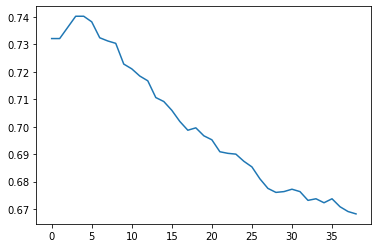

In [ ]:
KVoisinsScore = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors = i, weights = "distance", metric = "euclidean")
    model.fit(X_train,y_train)
    KVoisinsScore.append(model.score(X_test,y_test))
plt.plot(KVoisinsScore)

In [ ]:
cross_val_score(KNeighborsClassifier(2),X_train,y_train,cv=5,scoring='accuracy').mean()

0.6695793049278906

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
val_score_K=[]
for k in range(1,50):
    score =cross_val_score(KNeighborsClassifier(n_neighbors = k, weights = "distance", metric = "euclidean"),X_train,y_train,cv=5,scoring='accuracy').mean()
    val_score_K.append(score)


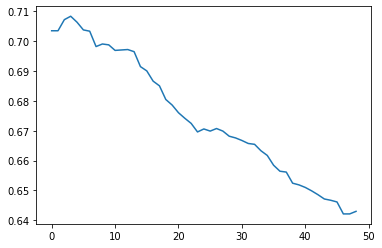

In [ ]:
plt.plot(val_score_K)

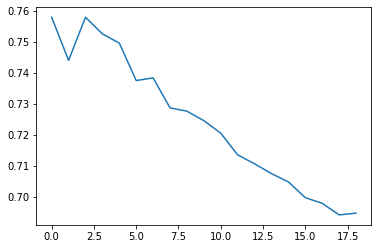

In [ ]:
KVoisinsScore = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train2,y_train2)
    KVoisinsScore.append(model.score(X_test2,y_test2))
plt.plot(KVoisinsScore)

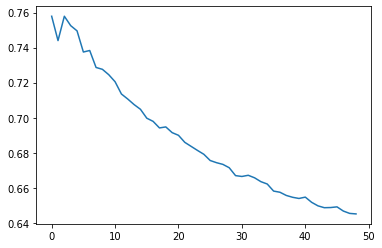

In [ ]:
KVoisinsScore = []
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train2,y_train2)
    KVoisinsScore.append(model.score(X_test2,y_test2))
plt.plot(KVoisinsScore)

**3.2.2 RandomForest**

**In the following section, we discover how RandomForestClassifier perfom well with our dataset.
The main point here is to tune it and exploit at the maximum its hyperparameters.**

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train2, y_train2)
clf.score(X_test2,y_test2)

0.9852448021462106

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9822777454968041

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9912841371295759

**'Entropy' criterion improve the score of the model.**

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf = clf.fit(X_train2, y_train2)
clf.score(X_test2,y_test2)

0.9921433362077225

**Now that we have a model that perfoms at a pretty good accuracy, we need to study the impact of the ratio train/test on our dataset, using the greatest model we used (so far).**

Ratio 0.08 % Accu 0.99641 %
Ratio 0.13 % Accu 0.99705 %
Ratio 0.18 % Accu 0.99681 %
Ratio 0.23 % Accu 0.99583 %
Ratio 0.28 % Accu 0.99555 %
Ratio 0.33 % Accu 0.99245 %
Ratio 0.38 % Accu 0.9889 %
Ratio 0.43 % Accu 0.98707 %
Ratio 0.48 % Accu 0.97963 %
Ratio 0.53 % Accu 0.97413 %
Ratio 0.58 % Accu 0.9643 %
Ratio 0.63 % Accu 0.95221 %
Ratio 0.68 % Accu 0.94079 %
Ratio 0.73 % Accu 0.91739 %
Ratio 0.78 % Accu 0.89196 %
Ratio 0.83 % Accu 0.8518 %
Ratio 0.88 % Accu 0.81283 %
Ratio 0.93 % Accu 0.77918 %
Ratio 0.98 % Accu 0.66318 %


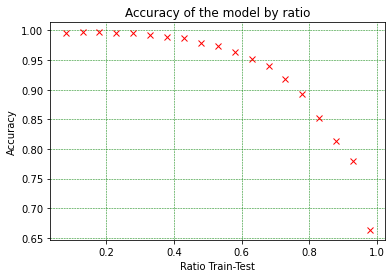

In [ ]:
ScoreRatioRandomForest = []
RatioRandom = []
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(monX, monY, test_size=0.03 + i*0.05, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)
    clf = clf.fit(X_train, y_train)
    ScoreRatioRandomForest.append(clf.score(X_test,y_test))
    ratioo = 0.03 + i*0.05
    RatioRandom.append(ratioo)

for i in range(len(ScoreRatioRandomForest)):
    print("Ratio",round(RatioRandom[i],5)," Accu",round(ScoreRatioRandomForest[i],5))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(RatioRandom,ScoreRatioRandomForest, 'rx')
plt.xlabel('Ratio Train-Test')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model by ratio')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)    

**We can see that the accuracy is pretty stable within the first 40% ratio, but then decline sharply.**

**But let mix the training set and the testing set to have more data to actually test if the number of sample stabalize the decrease of accuracy when shifting the ratio.**

Ratio 0.08 % Accu 0.99641 %
Ratio 0.13 % Accu 0.99705 %
Ratio 0.18 % Accu 0.9976 %
Ratio 0.23 % Accu 0.99771 %
Ratio 0.28 % Accu 0.99658 %
Ratio 0.33 % Accu 0.99724 %
Ratio 0.38 % Accu 0.99697 %
Ratio 0.43 % Accu 0.99655 %
Ratio 0.48 % Accu 0.99401 %
Ratio 0.53 % Accu 0.99114 %
Ratio 0.58 % Accu 0.98934 %
Ratio 0.63 % Accu 0.98684 %
Ratio 0.68 % Accu 0.98238 %
Ratio 0.73 % Accu 0.97486 %
Ratio 0.78 % Accu 0.96621 %
Ratio 0.83 % Accu 0.95237 %
Ratio 0.88 % Accu 0.91826 %
Ratio 0.93 % Accu 0.85794 %
Ratio 0.98 % Accu 0.70748 %


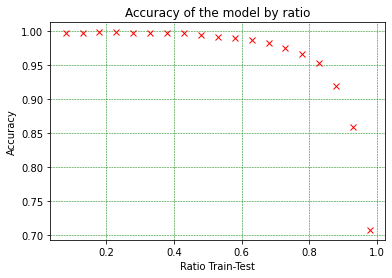

In [ ]:
#faire un mix des deux dataset (df et df_Test) puis refaire le test des ratios
df_Mix = df
df_Mix = df_Mix.append(df_Test, ignore_index=True)
df_Mix = shuffle(df_Mix,random_state = 42)
monX_Mix = df_Mix[colonnes]
monY_Mix = df_Mix["Copyist"]

ScoreRatioRandomForest = []
RatioRandom = []
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(monX_Mix, monY_Mix, test_size=0.03 + i*0.05, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)
    clf = clf.fit(X_train, y_train)
    ScoreRatioRandomForest.append(clf.score(X_test,y_test))
    ratioo = 0.03 + i*0.05
    RatioRandom.append(ratioo)

for i in range(len(ScoreRatioRandomForest)):
    print("Ratio",round(RatioRandom[i],5),"% Accu",round(ScoreRatioRandomForest[i],5),"%")
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(RatioRandom,ScoreRatioRandomForest, 'rx')
plt.xlabel('Ratio Train-Test')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model by ratio')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5) 

**We can see that the ratio is more stable even approaching the 70% or test/train.**
**But we can also conclude that a ratio of 33% test/train gives us a pretty good accuracy, which is optimal for our case.**

**So the RandomForest model gives us good accuracy, but let's find next if we can tune its parameters to have a further better accuracy.**

In [ ]:
RandomForestScore = []
N_Esti_list = []
for i in range(1,125):
    N_Esti_list.append(i*4)
    clf = RandomForestClassifier(n_estimators=i*4, criterion="entropy",random_state=0)
    clf = clf.fit(X_train2, y_train2)
    RandomForestScore.append(clf.score(X_test2,y_test2))

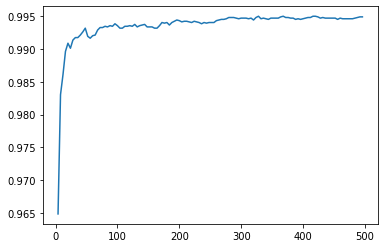

In [ ]:
plt.plot(N_Esti_list,RandomForestScore)

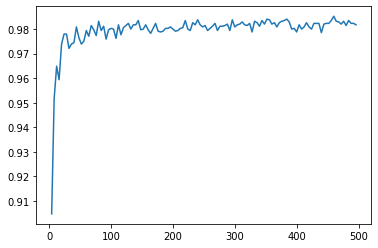

In [ ]:
RandomForestScore = []
for i in range(1,125):
    clf = RandomForestClassifier(n_estimators=i*4)
    clf = clf.fit(X_train, y_train)
    RandomForestScore.append(clf.score(X_test,y_test))
plt.plot(N_Esti_list,RandomForestScore)

In [ ]:
clf = RandomForestClassifier(n_estimators=200, criterion="entropy")
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.9803952471216165

**We can actually use the GridSearch method to find the optimal parameters for our model.**

In [ ]:
rfGrid = RandomForestClassifier(random_state=42)
parametres = { 
    'n_estimators': [200, 350, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator = rfGrid, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.9802523904176434 RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=42)


**Using 'entropy' criterion and a number of estimators of '500' gave us the best accuracy on all the tested parameters.**

### **3.2.3 Testing much more models**

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6775130737943056

In [ ]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0, criterion="entropy")
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.9712373643501351

In [ ]:
clf = ExtraTreesClassifier(n_estimators=200, min_samples_split=2,
    random_state=0, criterion="entropy")
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.9667997947778961

In [ ]:
clf = AdaBoostClassifier(n_estimators=200)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.4921279299705173

In [ ]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5883207437536316

In [ ]:
clf = GaussianNB()
clf.fit(X_train2, y_train2)
clf.score(X_test2, y_test2)

0.29328351058733354

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5674026728646135

**In the section below, we tested several models and the models that gave us the best accuracy were part of the 'tree' section of sklearn models.**

### **3.2.4 Voting Classifier**

**A voting classifier is an ensemble meta-estimator that fits several base classifiers, each on the whole dataset. Then it averages the individual predictions to form a final prediction.**

**By tuning the hyperparameters a composed-based estimator fo our best models, we might be able to achieve better scores using cross validation.**

**a) Hard voting**

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors = 4, weights = "distance", metric = "euclidean")
clf2 = RandomForestClassifier(n_estimators=200, criterion="entropy")
clf3 = ExtraTreesClassifier(n_estimators=200, min_samples_split=2,
    random_state=0, criterion="entropy")

eclf = VotingClassifier(
    estimators=[('knn', clf1), ('rf', clf2), ('et', clf3)],
    voting='hard')

In [ ]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['KNeighborsClassifier', 'Random Forest', 'ExtraTrees', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.71 (+/- 0.01) [KNeighborsClassifier]
Accuracy: 0.98 (+/- 0.00) [Random Forest]
Accuracy: 0.97 (+/- 0.01) [ExtraTrees]
Accuracy: 0.96 (+/- 0.00) [Ensemble]


**Using a hard voting model composed by KNeighbors, RandomForest and ExtraTrees, we were able to achieve an accuracy of 96%. But it was less efficient than the RandomForest alone.**

**b) Soft voting**

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors = 4, weights = "distance", metric = "euclidean")
clf2 = RandomForestClassifier(n_estimators=200, criterion="entropy")
clf3 = ExtraTreesClassifier(n_estimators=200, min_samples_split=2,
    random_state=0, criterion="entropy")

eclf = VotingClassifier(
    estimators=[('knn', clf1), ('rf', clf2), ('et', clf3)],
    voting='soft', weights=[1, 4, 1])

In [ ]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['KNeighborsClassifier', 'Random Forest', 'ExtraTrees', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.71 (+/- 0.01) [KNeighborsClassifier]
Accuracy: 0.98 (+/- 0.00) [Random Forest]
Accuracy: 0.97 (+/- 0.01) [ExtraTrees]
Accuracy: 0.97 (+/- 0.00) [Ensemble]


**Using soft voting and privileging the RandomForest estimator increased our global accuracy but still : RandomForest alone was better than our composed-based estimator.**

### **3.2.5 Exploring all the models available**

**We needed to find the best sklearn algorithms for our dataset. So we tested all of the classifier models of the library and ranked them by their score on our dataset.**

In [ ]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

**A list of all the available algorithms of the library :**

In [ ]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> decomposition
DictionaryLearning,FactorAnalysis,FastICA,IncrementalPCA,KernelPCA,LatentDirichletAllocation,MiniBatchDictionaryLearning,MiniBatchSparsePCA,NMF,PCA,SparseCoder,SparsePCA,TruncatedSVD

===> dummy
DummyClassifier,DummyRegressor

===> ensemble
AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier,GradientBoostingRegressor,IsolationForest,RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding,StackingClassifier,StackingRegressor,VotingClassifier,VotingRegressor

===> feature_extraction
DictVectorizer,FeatureHasher

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,GammaRegressor,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClas

In [ ]:

warnings.filterwarnings("ignore", category=DeprecationWarning) 

**We now have the list of all the available algorithms in sklearn, we need now to test all of them.**

In [ ]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
c=0
algoPerfs = []
error = 0

for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
        print (name)
        print (performance)
        algoPerfs.append([name,performance])
        print ("="*30)
    except Exception as e:
        error = error +1
    

Factor Analysis (FA).
-14.638614613237644
Principal component analy
-14.226114645330398
DummyClassifier is a
0.4125508425334108
An AdaBoost classifier.
0.4811156304474143
A Bagging classifier.
0.9738524113887275
An extra-trees class
0.9706565950029052
Gradient Boosting for cla
0.9453805926786751
A random forest clas
0.9767576990122022
Logistic Regression
0.5674026728646135
Logistic Regression CV (a
0.5665310865775712
Passive Aggressive Classi
0.46658919233004065
Perceptron

    Read more
0.42155723416618246
Classifier using Ridge re
0.4915746658919233
Ridge classifier with bui
0.4912841371295758
Linear classifiers (SVM,
0.484601975595584
Naive Bayes classifier fo
0.5081348053457292
Gaussian Naive Bayes
0.2940151074956421
Classifier implementing t
0.7132481115630448
Kernel Density Estimation
-44048.620735471086
Nearest centroid classifi
0.3274259151656014
Linear Support Vector Cla
0.5334108076699593
C-Support Vector Classifi
0.6385822196397444
A decision tree classifie
0.964846019755955

In [ ]:
best_algorithm, best_perf

(RandomForestClassifier(), 0.9767576990122022)

In [ ]:
sorted(algoPerfs, key=itemgetter(1), reverse=True)

[['A random forest clas', 0.9767576990122022],
 ['A Bagging classifier.', 0.9738524113887275],
 ['An extra-trees class', 0.9706565950029052],
 ['A decision tree classifie', 0.9648460197559559],
 ['Gradient Boosting for cla', 0.9453805926786751],
 ['An extremely randomized t', 0.7858803021499129],
 ['Classifier implementing t', 0.7132481115630448],
 ['C-Support Vector Classifi', 0.6385822196397444],
 ['Logistic Regression', 0.5674026728646135],
 ['Logistic Regression CV (a', 0.5665310865775712],
 ['Linear Support Vector Cla', 0.5334108076699593],
 ['Naive Bayes classifier fo', 0.5081348053457292],
 ['Classifier using Ridge re', 0.4915746658919233],
 ['Ridge classifier with bui', 0.4912841371295758],
 ['Linear classifiers (SVM,', 0.484601975595584],
 ['An AdaBoost classifier.', 0.4811156304474143],
 ['Passive Aggressive Classi', 0.46658919233004065],
 ['Perceptron\n\n    Read more', 0.42155723416618246],
 ['DummyClassifier is a', 0.4125508425334108],
 ['Nearest centroid classifi', 0.3274

**It came out that the RandomForest is still the most accurate of the tested algorithms for our dataset, but we need to tune and test the Bagging and the GradientBoosting Classifiers with the best hyperparameters possible, as they were part of the five best algorithms tested.**

In [ ]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=300, criterion="entropy"),
                        n_estimators=20, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9799535153980244

In [ ]:
clf = RandomForestClassifier(n_estimators=200, criterion="entropy",random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9921557234166183

**BaggingClassifier with the best hyperparameters possible were still less accurate than our modified RandomForestClassifier model.**

**But the GradientBoosting model is an other story.**

### **3.2.6 Finding and building the most accurate prediction model for our dataset**

**We needed to find the best hyperparameters for the GradientBoosting model, so we used again the GridSearch method to find the most efficient hyperparameters.**

In [ ]:
clf = GradientBoostingClassifier()
parametres = { 
    'n_estimators': [175,200,250],
    'learning_rate' : [0.12,0.15,0.2],
    'subsample' :[0.8,1,1.2]
}
grid = GridSearchCV(estimator = clf, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9938467162927302 GradientBoostingClassifier(learning_rate=0.2, n_estimators=250, subsample=1)


In [ ]:
clf = GradientBoostingClassifier()
parametres = { 
    'n_estimators': [250,400],
    'learning_rate' : [0.2,0.5],
    'criterion' :['friedman_mse', 'squared_error']
}
grid = GridSearchCV(estimator = clf, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.993989470590464 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           n_estimators=400)


In [ ]:
clf = GradientBoostingClassifier()
parametres = { 
    'n_estimators': [400],
    'learning_rate' : [0.2],
    'criterion' :['squared_error'],
    'max_depth' :[2,3,4]
}
grid = GridSearchCV(estimator = clf, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9944189623585385 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, n_estimators=400)


In [ ]:
clf = GradientBoostingClassifier()
parametres = { 
    'n_estimators': [400],
    'learning_rate' : [0.2],
    'criterion' :['squared_error'],
    'max_depth' :[4,7,10]
}
grid = GridSearchCV(estimator = clf, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9945623310937088 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, n_estimators=400)


In [ ]:
clf = GradientBoostingClassifier()
parametres = { 
    'n_estimators': [400],
    'learning_rate' : [0.2],
    'criterion' :['squared_error'],
    'max_depth' :[4,5,6]
}
grid = GridSearchCV(estimator = clf, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9948484541266129 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, n_estimators=400)


In [ ]:
clf = GradientBoostingClassifier()
parametres = { 
    'n_estimators': [400],
    'learning_rate' : [0.2],
    'criterion' :['squared_error'],
    'max_depth' :[4],
    'max_features' :['auto', 'sqrt','log2']
}
grid = GridSearchCV(estimator = clf, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9945621262812301 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, max_features='auto', n_estimators=400)


In [ ]:
clf = GradientBoostingClassifier()
parametres = { 
    'n_estimators': [400,500],
    'learning_rate' : [0.2],
    'criterion' :['squared_error'],
    'max_depth' :[4],
    'max_features' :['auto']
}
grid = GridSearchCV(estimator = clf, param_grid= parametres, cv= 5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9949917204555438 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, max_features='auto', n_estimators=400)


In [ ]:
clf = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, max_features='auto', n_estimators=400)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.9944190647647779

**It cames out that the most efficient hyperparameters for the GradientBoosting model, in our case, were the hyperparameters above. At this point, we achieved an average accuracy of 99.44% with this model, which is greater than our previous RandomForest model.**

**So we tested the voting classifier with our three most accurate modified model, first with a hard voting :**

In [ ]:
clf1 = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, max_features='auto', n_estimators=400, random_state=42)
clf2 = RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=42)
clf3 = ExtraTreesClassifier(n_estimators=200, min_samples_split=2,
    random_state=42, criterion="entropy")

eclf = VotingClassifier(
    estimators=[('gbc', clf1), ('rf', clf2), ('et', clf3)],
    voting='hard')

In [ ]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['GradientBoostingClassifier', 'Random Forest', 'ExtraTrees', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.9f (+/- %0.9f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.994132839 (+/- 0.001887066) [GradientBoostingClassifier]
Accuracy: 0.978535447 (+/- 0.004720471) [Random Forest]
Accuracy: 0.966800409 (+/- 0.005589867) [ExtraTrees]
Accuracy: 0.986978125 (+/- 0.001455413) [Ensemble]


**And then with a soft voting method.**

In [ ]:
clf1 = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=4, max_features='auto', n_estimators=400, random_state=42)
clf2 = RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=42)
clf3 = ExtraTreesClassifier(n_estimators=200, min_samples_split=2,
    random_state=42, criterion="entropy")

eclfSoft = VotingClassifier(
    estimators=[('gbc', clf1), ('rf', clf2), ('et', clf3)],
    voting='soft')

In [ ]:
for clf, label in zip([clf1, clf2, clf3, eclfSoft], ['GradientBoostingClassifier', 'Random Forest', 'ExtraTrees', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.9f (+/- %0.9f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.994132839 (+/- 0.001887066) [GradientBoostingClassifier]
Accuracy: 0.978535447 (+/- 0.004720471) [Random Forest]
Accuracy: 0.966800409 (+/- 0.005589867) [ExtraTrees]
Accuracy: 0.995134475 (+/- 0.001716859) [Ensemble]


## **We have now achieved an accuracy of 99.51% with our soft voting composed-base model using modified GradientBoosting RandomForest annd ExtraTrees model. This was the best accuracy we were able to achieve and a nice trip into this machine learning branch.**

### **Testing Flask api**

In [ ]:
!pip install flask

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    return "<h1>GFG is great platform to learn</h1>"
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://ec0c-35-231-226-103.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
!pip install Flask


In [ ]:
from flask import Flask

In [ ]:
app = Flask(__name__)

### **Source**

### **Source of data :**

Claudio De Stefano, destefano '@' unicas.it, University of Cassino and Southern Lazio (ITALY)
Francesco Fontanella, fontanella '@' unicas.it, University of Cassino and Southern Lazio (ITALY)
Marilena Maniaci, m.maniaci '@' unicas.it, University of Cassino and Southern Lazio (ITALY)
Alessandra Scotto di Freca, a.scotto '@' unicas.it, University of Cassino and Southern Lazio (ITALY)